Google Drive Authentication
---

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
%cd /gdrive/My Drive/IIC/

Mounted at /gdrive
/gdrive/My Drive/DrRabiee-Project/Refactor/P3


Importing/Installing the Necessary Libraries
---

In [ ]:
!pip uninstall h5py
!pip install h5py==2.10.0

Uninstalling h5py-2.10.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/h5py-2.10.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/h5py/*
Proceed (y/n)? y
  Successfully uninstalled h5py-2.10.0
  Using cached https://files.pythonhosted.org/packages/3f/c0/abde58b837e066bca19a3f7332d9d0493521d7dd6b48248451a9e3fe2214/h5py-2.10.0-cp37-cp37m-manylinux1_x86_64.whl
ERROR: tensorflow 2.5.0 has requirement h5py~=3.1.0, but you'll have h5py 2.10.0 which is incompatible.


In [ ]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.simplefilter('ignore')

In [ ]:
pip install innvestigate

In [ ]:
%matplotlib inline  
%tensorflow_version 1.x
import imp
import numpy as np
import os

import keras
import keras.backend
import keras.models

import innvestigate
import innvestigate.utils as iutils

# Use utility libraries to focus on relevant iNNvestigate routines.
eutils = imp.load_source("utils", "utils.py")
mnistutils = imp.load_source("utils_mnist", "utils_mnist.py")
from keras.models import model_from_json
from keras.datasets import cifar10
from keras import regularizers
from keras import optimizers
from keras import backend as K
from keras.models import Model
from skimage import feature, transform
import matplotlib.pyplot as plt

TensorFlow 1.x selected.


Using TensorFlow backend.


In [ ]:
import random
import bottleneck as bn
from sklearn.metrics import accuracy_score
from skimage.color import gray2rgb
from skimage.color import rgb2gray

Config
---

In [ ]:
num_classes = 10
weight_decay = 0.0005
x_shape = [32,32,3]
batch_size = 128
maxepoches = 250
learning_rate = 0.1
lr_decay = 1e-6
lr_drop = 20

Loading the Data
---

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

Normalizing the Data
---

In [ ]:
def normalize(X_train,X_test):
    # this function normalizes inputs so that they have zero mean and unit variance
    # it is used when training a model
    # Input: training set and test set
    # Output: normalized training set and test set according to the trianing set statistics.
    mean = np.mean(X_train,axis=(0,1,2,3))
    std = np.std(X_train, axis=(0, 1, 2, 3))
    X_train = (X_train-mean)/(std+1e-7)
    X_test = (X_test-mean)/(std+1e-7)
    return X_train, X_test

In [ ]:
x_train, x_test = normalize(x_train, x_test)

Data Preparation
---

In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Loading the Model
---

In [ ]:
# Create & train model
if keras.backend.image_data_format == "channels_first":
    input_shape = (3, 32, 32)
else:
    input_shape = (32, 32, 3)

model = keras.models.Sequential()

model.add(keras.layers.Conv2D(64, (3, 3), padding='same',
                    input_shape=x_shape,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.4))

model.add(keras.layers.Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.4))

model.add(keras.layers.Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.4))

model.add(keras.layers.Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))


model.add(keras.layers.Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.4))

model.add(keras.layers.Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.4))

model.add(keras.layers.Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))


model.add(keras.layers.Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.4))

model.add(keras.layers.Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.4))

model.add(keras.layers.Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_classes))
model.add(keras.layers.Activation('softmax'))


sgd = optimizers.SGD(learning_rate=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [ ]:
model.load_weights('models/cifar10.h5')

Layer-wise Relevance Propagation
---

In [ ]:
pip install -e git+https://github.com/marcoancona/DeepExplain.git#egg=deepexplain

Obtaining deepexplain from git+https://github.com/marcoancona/DeepExplain.git#egg=deepexplain
  Updating ./src/deepexplain clone
  Running command git fetch -q --tags
  Running command git reset --hard -q 87fb43a13ac2a3b285a030b87df899cc40100c94
  Found existing installation: deepexplain 0.3
    Can't uninstall 'deepexplain'. No files were found to uninstall.
  Running setup.py develop for deepexplain


In [ ]:
from deepexplain.tensorflow import DeepExplain

In [ ]:
%%time

def flatten(t):
    return [item for sublist in t for item in sublist]
    
with DeepExplain(session=K.get_session()) as de:  # <-- init DeepExplain context
    # Need to reconstruct the graph in DeepExplain context, using the same weights.
    # With Keras this is very easy:
    # 1. Get the input tensor to the original model
    input_tensor = model.layers[0].input
    
    # 2. We now target the output of the last dense layer (pre-softmax)
    # To do so, create a new model sharing the same layers untill the last dense (index -2)
    fModel = Model(inputs=input_tensor, outputs = model.layers[-2].output)
    target_tensor = fModel(input_tensor)
    
    indices = [i for i in range(1000)]


    xs = x_test[indices]
    ys = y_test[indices]
    
    #attributions_gradin = de.explain('grad*input', target_tensor, input_tensor, xs, ys=ys)
    #attributions_sal   = de.explain('saliency', target_tensor, input_tensor, xs, ys=ys)
    #attributions_ig    = de.explain('intgrad', target_tensor, input_tensor, xs, ys=ys)
    #attributions_dl    = de.explain('deeplift', target_tensor, input_tensor, xs, ys=ys)
    attributions_elrp  = de.explain('elrp', target_tensor, input_tensor, xs, ys=ys)
    #attributions_occ   = de.explain('occlusion', target_tensor, input_tensor, xs, ys=ys)
    
    # Compare Gradient * Input with approximate Shapley Values
    # Note1: Shapley Value sampling with 100 samples per feature (78400 runs) takes a couple of minutes on a GPU.
    # Note2: 100 samples are not enough for convergence, the result might be affected by sampling variance
    #attributions_sv     = de.explain('shapley_sampling', target_tensor, input_tensor, xs, ys=ys, samples=100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


CPU times: user 3min 15s, sys: 6.43 s, total: 3min 21s
Wall time: 1min 49s


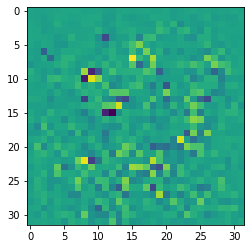

In [ ]:
plt.imshow(rgb2gray(attributions_elrp[0]))

Image Desctruction: Adding Pepper Noise to the Images such that only 20 percent of the most important pixels of each one remains.
---

In [ ]:
# the following function gets the top n elements (in terms of magnitude) from a numpy array
def top_n_indexes(arr, n):
    idx = bn.argpartition(arr, arr.size-n, axis=None)[-n:]
    width = arr.shape[1]
    return [divmod(i, width) for i in idx]

In [ ]:
# given a list of tuples (pixel indices), this function generates a list of other pixels
def get_other_pixels(idx_list):
    idx_list = set(idx_list)
    other_pixels = []
    for i in range(28):
        for j in range(28):
            if (i,j) not in idx_list:
                other_pixels.append((i,j))
    return other_pixels

In [ ]:
# given an image and a heatmap showing the importance of each pixels, this function destructs the image such that only a specified percentage of
# the most important pixels remains, and the other ones get replaced by salt and pepper noise
def destruct_image(img, heatmap, percentage=0.2):
    result = img.copy()
    idx_list = top_n_indexes(heatmap, int(percentage*(28*28)))
    idx_list.sort(key = lambda tup: tup[0])
    other_pixels = get_other_pixels(idx_list)
    for idx in other_pixels:
        #random_val = random.sample([0,1], 1)[0]
        random_val = 0
        result[idx[0],idx[1],0] = random_val
        result[idx[0],idx[1],1] = random_val
        result[idx[0],idx[1],2] = random_val
    return result

In [ ]:
num_samples = 1000
new_x_test = []
for idx, curr_img in enumerate(x_test[:num_samples]):
    curr_heatmap = rgb2gray(attributions_elrp[idx])
    new_img = destruct_image(curr_img, curr_heatmap, 0.2)
    new_x_test.append(new_img)
new_x_test = np.array(new_x_test)

In [ ]:
new_predictions = model.predict(new_x_test)

In [ ]:
new_predictions = list(np.argmax(new_predictions, axis=1))
true_labels = list(np.argmax(y_test[:num_samples], axis=1))

In [ ]:
accuracy_score(true_labels, new_predictions)

0.229